## Final task - Satellite Climatology: Remote Sensing of a Changing Climate
### Statistical analysis of temporal and spatial patterns of liquid water cloud occurrence over Paris
Julia Fuchs, contact: julia.fuchs@kit.edu

Rename the Jupyter Notebook as follows: **Final_taskWS2021_FirstName_LastName.ipynb** and submit it at the latest on **Friday, the 12th of February, 12:00 AM** via email: julia.fuchs@kit.edu

During the first part of this seminar you got a basic overview over the state of the art of urban clouds (specifically fog holes) and open research questions. In the last exercises you got familiar with reading and exploring relevant data sets as well as with tools and methods of data visualisation, analysis and preprocessing (ice cloud/snow filter). As you have now a basic knowledge of the relevant recipes for applying your knowledge and do a scientific analysis on your own you can go ahead imagine being an urban cloud scientist and adress the final task. Have fun and do not hesitate to ask questions! 

#### Final task:

**1) What are the temporal and spatial patterns of cloud occurrence over the urban area of Paris during November?** (general, introduce/summarise your results)

**2) At which hour of the day and under which meteorological conditions cloud patterns are most pronounced/visible?** (specific, provide details of your results)

**To answer these questions compute the following figures:**

- Compute histograms of the 4 meteorological parameters (mean sea level pressure, wind speed at 10m, temperature at 2m, boundary layer height). Keep in mind that there might be meteorological differences during different hours of the day.

- Compute regional averages (one value per parameter) of all meterolocial parameters for specific cases of fog hole occurrence and hour of the day. Compare these values to the data distribution of the meteorological parameters (histograms). 

- Use these values as meteorological thresholds to compute the cloud fraction anomalies for different hours and specific meteorological conditions. You can try out different thresholds using the percentiles (e.g. 25th/75th percentiles of the meteorlogical parameters) as well.

Please give **complete** and **structured** answers in key points using the 'Markdown' cells. Use figures (mind the color bar scale) and numbers and include all meteorological parameters to support your statements. Include the code and code documentation so that your approach is transparent and understandable to others. Make sure that your Jupyter Notebook can be run without errors (Run --> Run All Cells).

(EXAMPLE for a key point): - fog holes occurr in conditions of low/high wind speeds (below/above ?? m/s) as shown in Figure X.)


In [1]:
# -*- coding: utf-8 -*-
import numpy as np # used for numerical operations
import xarray as xr # used for analysing 3 or more dimensional data
import matplotlib.pyplot as plt # used for plotting data

#data_path = "/this/is/an/example/directory/" # the location of the data files
data_path = r'C:\Users\user\Downloads' # this is my personal location of the data files

### This dataset (Nov 2004 - 2019) contains a cloud mask (cl_mask_glo_gmm3) that will be used throughout the analysis. Ice and snow filter are already applied. 

In [2]:
file_name = '\combined11_2004_2019_cl_mask_compare.nc'
data = xr.open_dataset(data_path + file_name)

In [5]:
cl_mask = data.cl_mask_glo_gmm3
cl_mask

<xarray.DataArray 'cl_mask_glo_gmm3' (time: 14821, y: 92, x: 109)>
[148624988 values with dtype=int64]
Coordinates:
    lat      (y, x) float64 49.64 49.64 49.64 49.64 ... 48.09 48.09 48.09 48.09
    lon      (y, x) float64 1.56 1.575 1.589 1.604 ... 3.001 3.016 3.03 3.044
  * time     (time) datetime64[ns] 2004-11-01T08:00:00 ... 2019-11-30T16:00:00
Dimensions without coordinates: y, x

* 1 = cloud
* 0 = clear sky
* -1 = not a number (nan)

### Add a new data set containing meteorological data (met_ds) and the urban_mask to locate the urban area of Paris

In [6]:
metds = xr.open_dataset(data_path + '\Paris_112004_112019_blh_t_wind_msl.nc')
urban_mask = xr.open_dataset(data_path + '\\ruralurbanmask_Paris_UrbClim_v10.nc')

### Explore the long_name of each data variable listed below

In [7]:
metds.keys #exploring the dataset

<bound method Mapping.keys of <xarray.Dataset>
Dimensions:    (latitude: 21, longitude: 21, time: 11520)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 1.0 ... 4.25 4.5 4.75 5.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... 45.5 45.25 45.0
  * time       (time) datetime64[ns] 2004-11-01 ... 2019-11-30T23:00:00
Data variables:
    blh        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-15 12:07:28 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...>

In [8]:
# wind speed has to be computed based on the u- and v component of wind at 10m
wind = np.sqrt(np.square(metds.u10) + np.square(metds.v10))
wind

<xarray.DataArray (time: 11520, latitude: 21, longitude: 21)>
array([[[ 9.576522  ,  8.316539  ,  8.092099  , ...,  4.83219   ,
          4.699482  ,  4.545492  ],
        [ 8.750756  ,  7.4166784 ,  6.17561   , ...,  4.68231   ,
          4.599057  ,  4.464138  ],
        [ 6.4806037 ,  5.710414  ,  4.517535  , ...,  4.508997  ,
          4.433897  ,  4.419484  ],
        ...,
        [ 3.950154  ,  3.6131399 ,  3.2292652 , ...,  0.56799966,
          0.5047234 ,  0.48609197],
        [ 3.1091387 ,  2.7810788 ,  2.57207   , ...,  0.18042386,
          0.5642273 ,  0.358889  ],
        [ 2.3625596 ,  2.0618246 ,  1.9348105 , ...,  1.1663201 ,
          1.2674435 ,  1.289006  ]],

       [[ 9.982141  ,  8.756866  ,  8.713317  , ...,  4.766082  ,
          4.514969  ,  4.2551346 ],
        [ 9.333514  ,  8.035753  ,  6.7534566 , ...,  4.785201  ,
          4.5684752 ,  4.3034153 ],
        [ 7.048188  ,  6.226373  ,  4.995519  , ...,  4.613936  ,
          4.3983088 ,  4.236139  ],
...
        [ 3.2963028 ,  2.7666407 ,  2.3102713 , ...,  2.1314785 ,
          2.120785  ,  2.009797  ],
        [ 2.9393773 ,  2.4469557 ,  2.0516565 , ...,  3.014118  ,
          2.8305602 ,  2.0413592 ],
        [ 2.6376486 ,  2.2854283 ,  1.9135177 , ...,  2.3983746 ,
          2.367454  ,  1.5213935 ]],

       [[10.678164  ,  9.30465   ,  9.171937  , ...,  4.967672  ,
          4.8903213 ,  5.137984  ],
        [ 9.232544  ,  7.7957983 ,  6.620428  , ...,  5.7924643 ,
          5.81996   ,  5.9979367 ],
        [ 6.763815  ,  6.0280843 ,  4.850011  , ...,  6.4525714 ,
          6.480522  ,  6.5234675 ],
        ...,
        [ 3.3002975 ,  2.9338593 ,  2.5806708 , ...,  1.7759795 ,
          1.6733218 ,  1.7831573 ],
        [ 2.8973749 ,  2.6011727 ,  2.4308908 , ...,  2.069127  ,
          1.8179281 ,  1.2834958 ],
        [ 2.7224276 ,  2.6165085 ,  2.4993358 , ...,  1.7637959 ,
          1.6978374 ,  0.9386177 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 1.0 ... 4.25 4.5 4.75 5.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... 45.5 45.25 45.0
  * time       (time) datetime64[ns] 2004-11-01 ... 2019-11-30T23:00:00

In [9]:
# msl is converted from Pa to hPa
msl = metds.msl/100. # in hPa

### Histogram of mean sea level pressure

# Oversimplified assumption 1

Let us assume an inverse relation between cloud cover and msl pressure. That is to say the opposite of clouds gather over low pressure zones. Using this assumption, we analyse the data from the metrological datasets to identify temporal patterns around Paris to identify peak activity which can precipate to form fog holes.

### Visualizing the hourly average of msl pressure (in hPa) in November

lowest : 1014.6565551757812 
highest : 1015.8036499023438
Average hour of highest pressure : 10


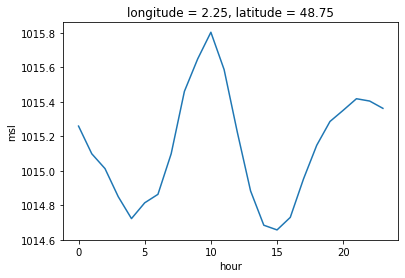

In [57]:
group=msl.groupby(msl.time.dt.hour)
hourly = group.mean(dim='time').sel(latitude =48.864716, longitude = 2.349014, method ='nearest')
hourly.plot()
print('lowest :',hourly.min().values,'\nhighest :',hourly.max().values)
print('Average hour of highest pressure :',plt.gca().lines[0].get_xydata()[:,1].argmax())

we see that the average msl rises to a peak at about 10 hours in November. It is interesting to see a second smaller peak form around 20 hours. Could the peaks be related to the rise in particulate matter and aerosols during peak traffic hours that precede 10 and 20 hours? Of course it would be premature to arrive at such a conclusion without more investigation. Let us view the statistical descriptors of the hourly msl data  

In [139]:
hours = []
#computing the statistical descriptors for each of the 24 hour groups
for i in range(24):
    msl10= msl[msl.time.dt.hour==i].sel(latitude =paris_lat,longitude =paris_lon, method ='nearest')
    df = msl10.to_dataframe()
    hours.append(df['msl'].describe())

#packing the data as a dataframe
import pandas as pd
df = pd.DataFrame(hours, index =range(24))
df.sort_values('max', ascending=False).head(24)

,count,mean,std,min,25%,50%,75%,max
10,480.0,1015.803650,11.051953,972.713257,1008.680176,1016.149536,1023.992737,1037.179321
11,480.0,1015.586975,10.999654,973.059753,1008.342529,1015.961334,1023.737610,1036.919189
9,480.0,1015.648315,11.096451,972.190796,1008.479019,1016.100281,1024.055298,1036.762085
8,480.0,1015.460632,11.091744,971.860962,1008.337051,1015.930328,1024.166595,1036.700073
12,480.0,1015.223083,10.941963,973.485962,1008.137787,1015.718384,1023.590927,1036.622559
23,480.0,1015.362061,10.853341,972.295959,1007.874298,1016.204895,1023.728729,1036.550659
22,480.0,1015.404358,10.808393,972.595947,1007.955948,1015.913208,1023.827240,1036.479736
0,480.0,1015.258911,10.907802,971.905151,1007.621368,1016.171082,1023.670639,1036.358032
21,480.0,1015.417847,10.793960,972.359070,1007.953964,1015.920929,1023.750885,1036.257324
20,480.0,1015.350769,10.767324,972.068970,1007.805679,1016.086426,1023.627731,1036.151001


We see that the 75% quantile for nearly all the hours is about 1023 hPa. We can by extending our over simplified assumption expect to find fog holes on days when the pressure is above 1024. Let's look for those dates in the cell below:

(2735, 7)


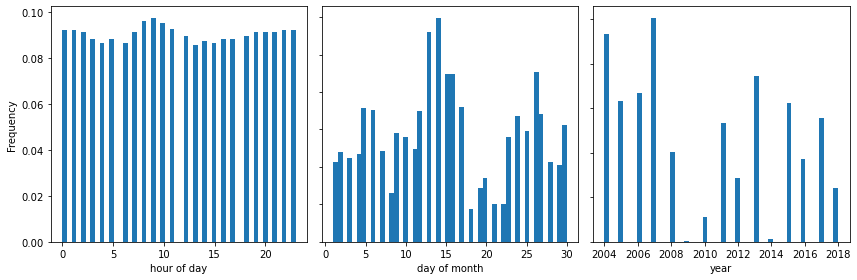

In [137]:
#selecting the coordinates corresponding/closest to Paris
hpres=msl.sel(latitude=paris_lat,longitude=paris_lon, method ='nearest')

#boolean mask of pressure over 1024 hPa
hpres = hpres[hpres>=1024]


dfp = hpres.to_dataframe()
dfp.reset_index(inplace =True)
dfp['year'] = dfp['time'].dt.year
dfp['day']  = dfp['time'].dt.day
dfp['hour'] = dfp['time'].dt.hour
print(dfp.shape)
plt.figure(figsize=(12,4))

#freq distribution of hours
ax=plt.subplot(131)
dfp.hour.plot(kind='hist', bins=50, density =True)
plt.xlabel('hour of day')

#freq distribution of days
plt.subplot(132)
dfp.day.plot(kind='hist', bins=50, density =True, sharey=ax)
plt.xlabel('day of month')

#freq distribution of the years
plt.subplot(133)
dfp.year.plot(kind='hist', density =True, bins=50, sharey=ax)
plt.xlabel('year')
plt.tight_layout()

While we don't see a vast variance between the frequency distribution of the hours when the msl is over 1024 hPa or the third quantile, the variance between the days of the month is pronounced, with the most frequent days around the middle of the months. From here we can safely argue that the fog holes are more likely to appear between 11th and 15th between 8am and 10 am, if our assumption about their relation with msl is valid. Also they make have been more frequent in 2007 when compared to 2009 or 2014.

Text(0.5, 1, 'Average hourly MSL pressure in November')

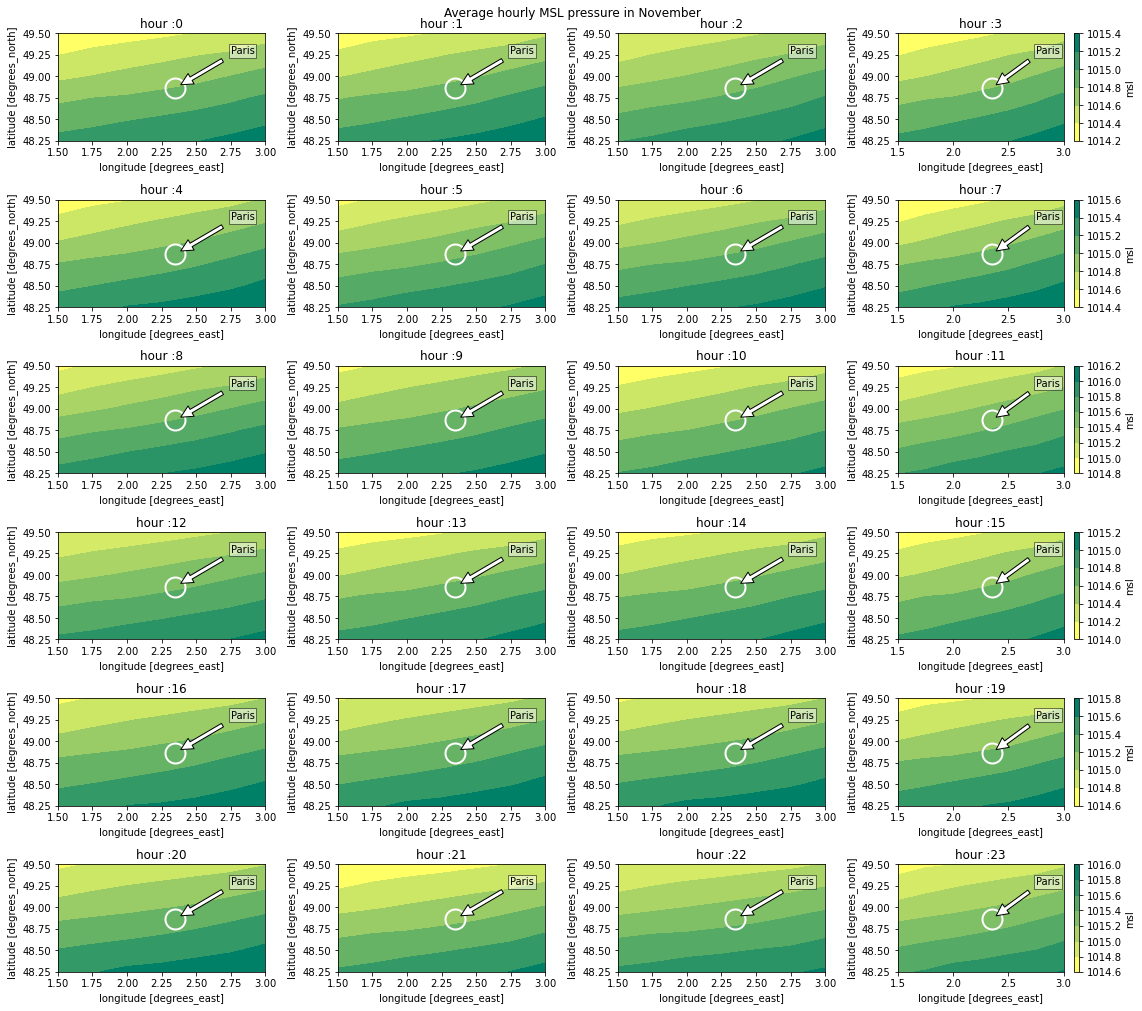

In [11]:
#lets plot the contour map of pressure for hourly averages over Paris to see if there's any patterns to suggest higher mean at 10
latmin = 48.04364503
latmax = 49.7082794

lonmin = 1.40623384
lonmax = 3.18511759

paris_lat = 48.864716
paris_lon = 2.349014

group = msl.groupby(msl.time.dt.hour)

f,axes = plt.subplots(6,4, figsize=(16,14))
axx =axes.flatten()


for idx,frame in group:
    if idx not in [3,7,11,15,19,23]:  cb =False
    else : cb =True
    frame.sel(latitude=slice(latmax,latmin),longitude =slice(lonmin,lonmax)).mean(dim='time').plot.contourf(cmap='summer_r',
                                                                                                            ax =axx[idx], add_colorbar=cb)
                                     
    axx[idx].set_title('hour :{}'.format(idx))
    axx[idx].plot([paris_lon], [paris_lat], 'o', ms=20, markerfacecolor="None",markeredgecolor='white', markeredgewidth=2)
    axx[idx].annotate('Paris', c='k',xy = (paris_lon, paris_lat),
                      xytext=(paris_lon+0.4,paris_lat+0.4),
                      arrowprops = dict(facecolor='white',shrink=0.1), fontsize=10,bbox={'facecolor': 'white', 
                                                                                          'alpha': 0.5, 'pad': 2})
    #print(idx,fr[0])
    #print(idx)
plt.tight_layout()              
f.suptitle('Average hourly MSL pressure in November', weight=16,ha ='center', va='top', y= 1)

While it is dissapointing that the peaks are not discernable in the maps, it isn't surprising as the spatial variation of the msl distribution around Paris is not very pronounced in these maps. We can clearly notice the contour lines for msl gradient passing through Paris at 10:00 hrs and 19:00 hrs. This is consistent with out earlier graph and establishes a pattern expected from the results therein. Let us examine the msl data a little further to see if we find any useful information for our search for the conditions for fog holes.

No discernible temporal changes were noticed in the narrowly defined area in the previous examination. To ascertain if this is the case with the entire geographical spread represented in the dataset, the same investigation is carried on the dataset without constraining the lat/lon coordinates 

Text(0.5, 1, 'Average hourly MSL pressure in the study period')

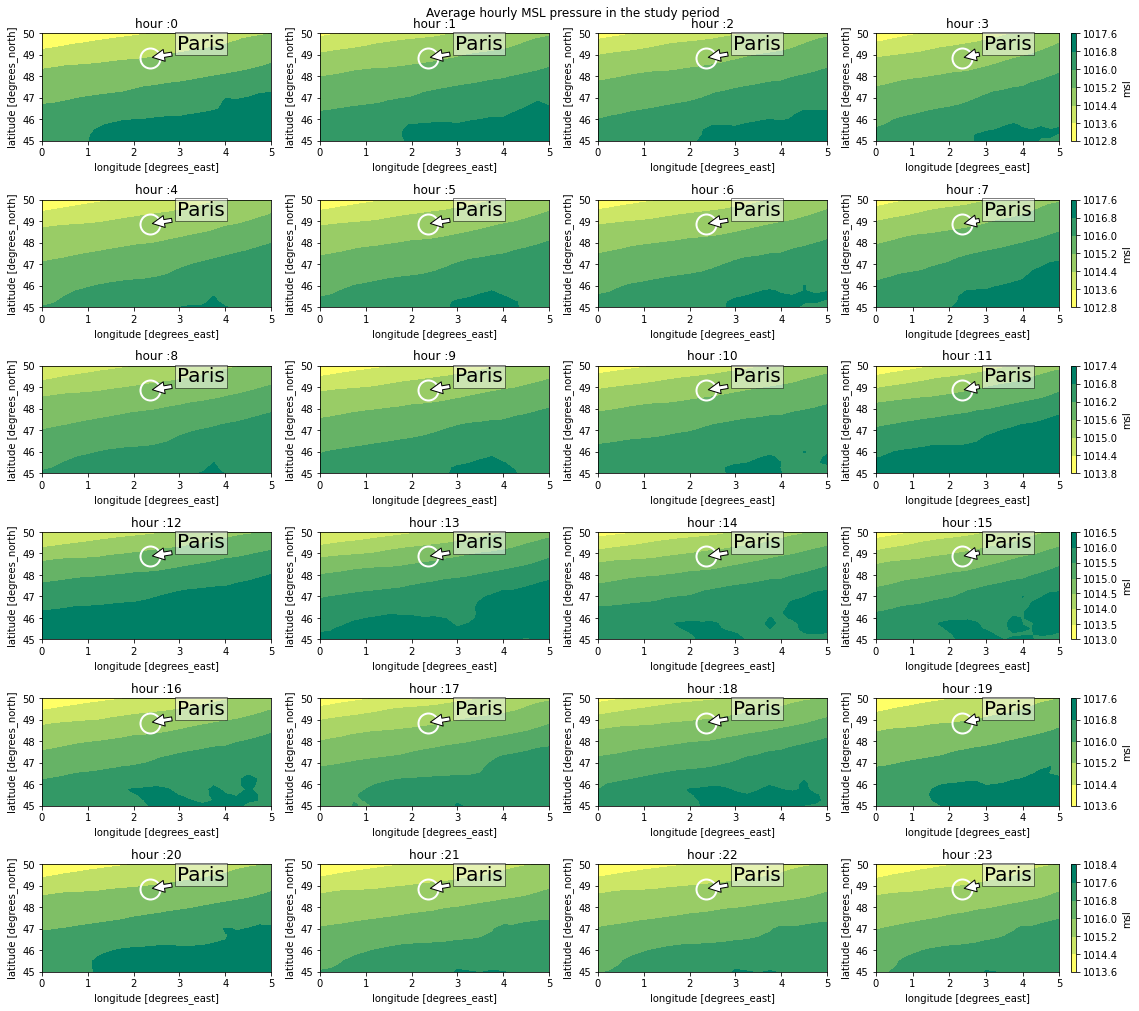

In [12]:
group = msl.groupby(msl.time.dt.hour)

f,axes = plt.subplots(6,4, figsize=(16,14))
axx =axes.flatten()


for idx,frame in group:
    if idx not in [3,7,11,15,19,23]: cb = False
    else : cb =True
    frame.mean(dim='time').plot.contourf(cmap='summer_r',ax=axx[idx],add_colorbar=cb)
    
    axx[idx].set_title('hour :{}'.format(idx))
    axx[idx].plot([paris_lon], [paris_lat], 'o', ms=20, markerfacecolor="None",markeredgecolor='white', markeredgewidth=2)
    axx[idx].annotate('Paris', c='k',xy = (paris_lon, paris_lat),
                      xytext=(paris_lon+0.6,paris_lat+0.4),
                      arrowprops = dict(facecolor='white',shrink=0.1), fontsize=20,bbox={'facecolor': 'white', 
                                                                                          'alpha': 0.5, 'pad': 2})
    axx[idx].set_title('hour :{}'.format(idx))
    #print(idx,fr[0])
    #print(idx)
plt.tight_layout()              
f.suptitle('Average hourly MSL pressure in the study period', weight=16,ha ='center', va='top', y= 1)


The hourly average MSL pressure of the entire region shows interesting pattern of rising along the latitudes during the day until 15 hours. This then recedes thereafter during the evening.

### Weekday patterns in msl

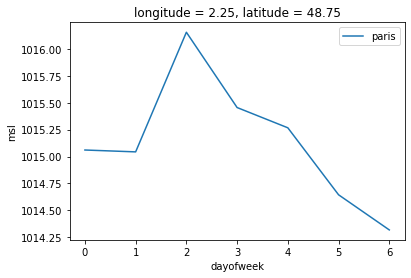

In [13]:
group=msl.groupby(msl.time.dt.weekday)
msl_m = group.mean(dim='time')
msl_m.sel(latitude =paris_lat, longitude = paris_lon, method ='nearest').plot(label='paris')
plt.legend()

Here we examine the temporal patterns of msl with the day of the week and plot(below) any significant observation on a 2D map to verify if it is accompaned with corresponding spatial pattern. The peak average msl observed over Paris on Tuesdays is definitely curious. However, pending further statistical significance tests we cannot attach any particular significance to the observation. Regardless. let's plot the 2D plot to see if there are any further interesting patterns

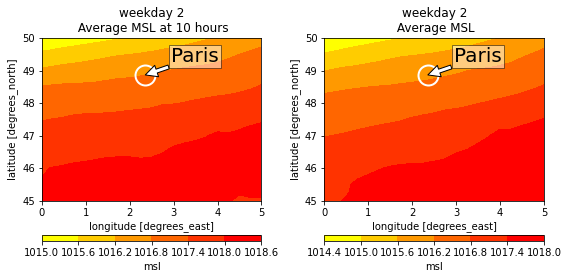

In [14]:
group=msl.groupby(msl.time.dt.weekday)
plt.figure(figsize=(8,4))
for idx, frame in group:
    if idx !=2: continue
    else:
        plt.subplot(121)
        frame[frame.time.dt.hour==10].mean(dim ='time').plot.contourf(cmap='autumn_r',
                                                                      cbar_kwargs ={'orientation':'horizontal', 'aspect':40})

        plt.title('weekday 2\n Average MSL at 10 hours')
        plt.plot([paris_lon], [paris_lat], 'o', ms=20, markerfacecolor="None",markeredgecolor='white', markeredgewidth=2)
        plt.annotate('Paris', c='k',xy = (paris_lon, paris_lat),
                      xytext=(paris_lon+0.6,paris_lat+0.4),
                      arrowprops = dict(facecolor='white',shrink=0.01), fontsize=20,bbox={'facecolor': 'white', 
                                                                                          'alpha': 0.5, 'pad': 2})
        
    break
plt.subplot(122)
frame.mean(dim='time').plot.contourf(cmap='autumn_r',cbar_kwargs ={'orientation':'horizontal', 'aspect':40})

plt.title('weekday 2\n Average MSL')
plt.plot([paris_lon], [paris_lat], 'o', ms=20, markerfacecolor="None",markeredgecolor='white', markeredgewidth=2)
plt.annotate('Paris', c='k',xy = (paris_lon, paris_lat),
              xytext=(paris_lon+0.6,paris_lat+0.4),
              arrowprops = dict(facecolor='white',shrink=0.01), fontsize=20,bbox={'facecolor': 'white', 
                                                                                  'alpha': 0.5, 'pad': 2})
#print(idx)
plt.tight_layout()

As before we notice a discernible spatial pattern in the overall image. However, nothing stands out remarkably over Paris that will help us make inferences about prevalence of fog holes. Although we clearly can see the frst map has higher average msl values at 10 hours on weekday 2, compared with the msl values of weekday 2 averaged over all hours.

### Daily patterns in msl 

Text(0.5, 1.02, 'Average daily MSL pressure at 10:00 hrs in November')

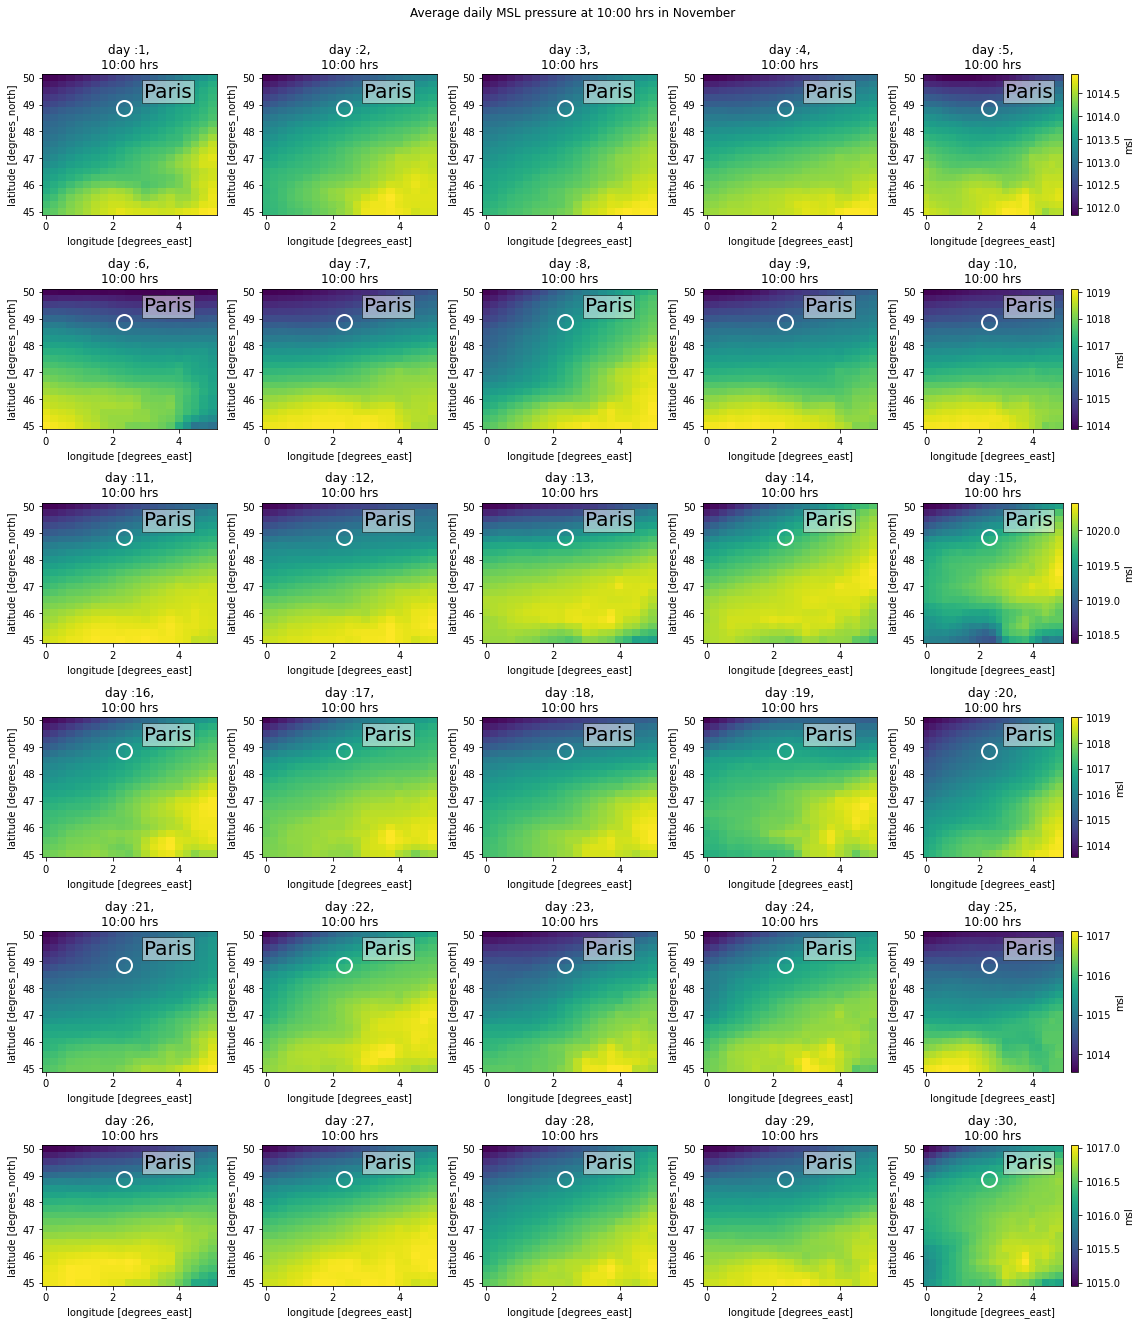

In [15]:
group = msl.groupby(msl.time.dt.day)

f,axes = plt.subplots(6,5, figsize=(16,18))
axx =axes.flatten()

for idx,frame in group:
    if idx not in [5,10,15,20,25,30]:
        cb = False
    else: 
        cb =True
    frame[frame.time.dt.hour==10].mean(dim='time').plot(ax=axx[idx-1], add_colorbar =cb)
    axx[idx-1].set_title('day :{},\n10:00 hrs'.format(idx))
    
    axx[idx-1].plot([paris_lon], [paris_lat], 'o', ms=15, markerfacecolor="None",markeredgecolor='white', markeredgewidth=2)
    axx[idx-1].annotate('Paris', c='k',xy = (paris_lon, paris_lat),
                      xytext=(paris_lon+0.6,paris_lat+0.4),
                      fontsize=20,bbox={'facecolor': 'white','alpha': 0.5, 'pad': 2})
    
plt.tight_layout()              
f.suptitle('Average daily MSL pressure at 10:00 hrs in November', weight=16,ha ='center', va='top', y= 1.02)


Here when we combine the results from our earlier analysis and plot the average day msl values at 10:00 hours, we start seeing some temporal patterns evolve through the spatial maps. Perhaps we can understand the oscillations if we plot the specific average msl values over the region for different hours and compare them with the day's average.

Text(0.5, 1.0, 'November average hourly msl\n Paris lat:48.86, lon:2.35')

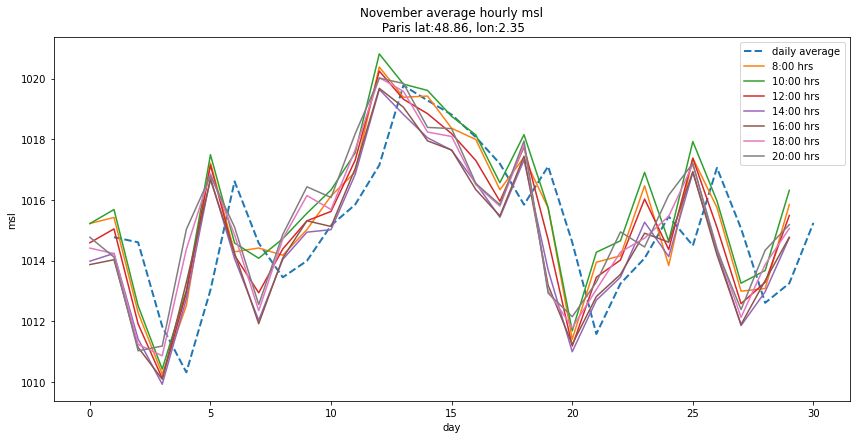

In [16]:
group= msl.groupby(msl.time.dt.day)

ax=plt.figure(figsize=(12,6))

group.mean(dim='time').sel(latitude =paris_lat, longitude =paris_lon,
                           method ='nearest').plot(ls='--',label='daily average',linewidth=2)

for i in range(8,21,2):
    values=[]
    for ix,fr in group:
        values.append(fr[fr.time.dt.hour ==i].sel(latitude =paris_lat,
                                               longitude =paris_lon, method ='nearest').mean(dim='time').values)

    plt.plot(values, label='{}:00 hrs'.format(i))

plt.tight_layout()
plt.legend()
plt.title('November average hourly msl\n Paris lat:{:.2f}, lon:{:.2f}'.format(paris_lat,paris_lon))

### Wind speed analysis 

Let's turn out attention to the wind speed to see if the patterns support our observations from msl. We expect wind speeds to be low when the pressure is high.Let's examine the wind dataset to find if this is the case.

wind speed range:  (3.5138131737709046, 4.140963637828827)
lowest wind speed at:  16


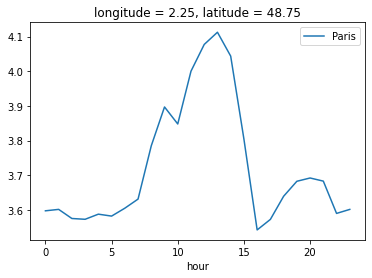

In [190]:
group = wind.groupby(wind.time.dt.hour)
hourly = group.mean(dim='time')
hourly.sel(latitude=paris_lat,longitude=paris_lon, method ='nearest').plot(label='Paris')
plt.legend()
print('wind speed range: ', plt.gca().get_ylim())
print('lowest wind speed at: ',plt.gca().lines[0].get_xydata()[:,1].argmin())

We see that on average the wind speed over Paris is lowest at about 16 hours. Let's take a look at the descriptive statistics of the wind speed averages to make sense of the observation.

In [223]:
hours = []
#computing the statistical descriptors for each of the 24 hour groups
for i in range(24):
    wind_low = wind[wind.time.dt.hour==i].sel(latitude =paris_lat,longitude =paris_lon, method ='nearest')
    df = wind_low.to_dataframe('wind_low')
    hours.append(df['wind_low'].describe())
    

#packing the data as a dataframe

df = pd.DataFrame(hours, index =range(24))
df.sort_values('max', inplace=True)
df.head(5)

,count,mean,std,min,25%,50%,75%,max
10,480.0,3.847882,1.848657,0.252229,2.407754,3.761451,5.000613,9.053821
9,480.0,3.896976,1.836259,0.079369,2.591814,3.777061,4.982558,9.299757
11,480.0,4.000096,1.949975,0.251442,2.482549,3.839565,5.242210,9.672412
21,480.0,3.683066,1.778046,0.419860,2.365049,3.202391,4.785830,9.784006
15,480.0,3.804345,1.871999,0.432074,2.398105,3.522488,4.825787,9.858333


The standard deviation of the means are about half the width of the mean itself, indicating a broad variance in the means. So let's instead sort by the hourly maximum wind speeds to find out the hour with the lowest maximum wind speed. The max column indicates the highest wind speed corresponding to the hour mentioned as the index of the row. We see here that the maximum wind speed at 10 hours is the lowest. This is a more reliable metric than mean as the std deviations of all the hourly means are roughly half the mean itself.
So we see the wind speed also pointing towards 10 hours as a probable hour for formation of fog holes, following our over simplified assumptions.

### visualizing the hourly average of wind speed in November

Text(0.5, 1.01, 'Average hourly November wind speed')

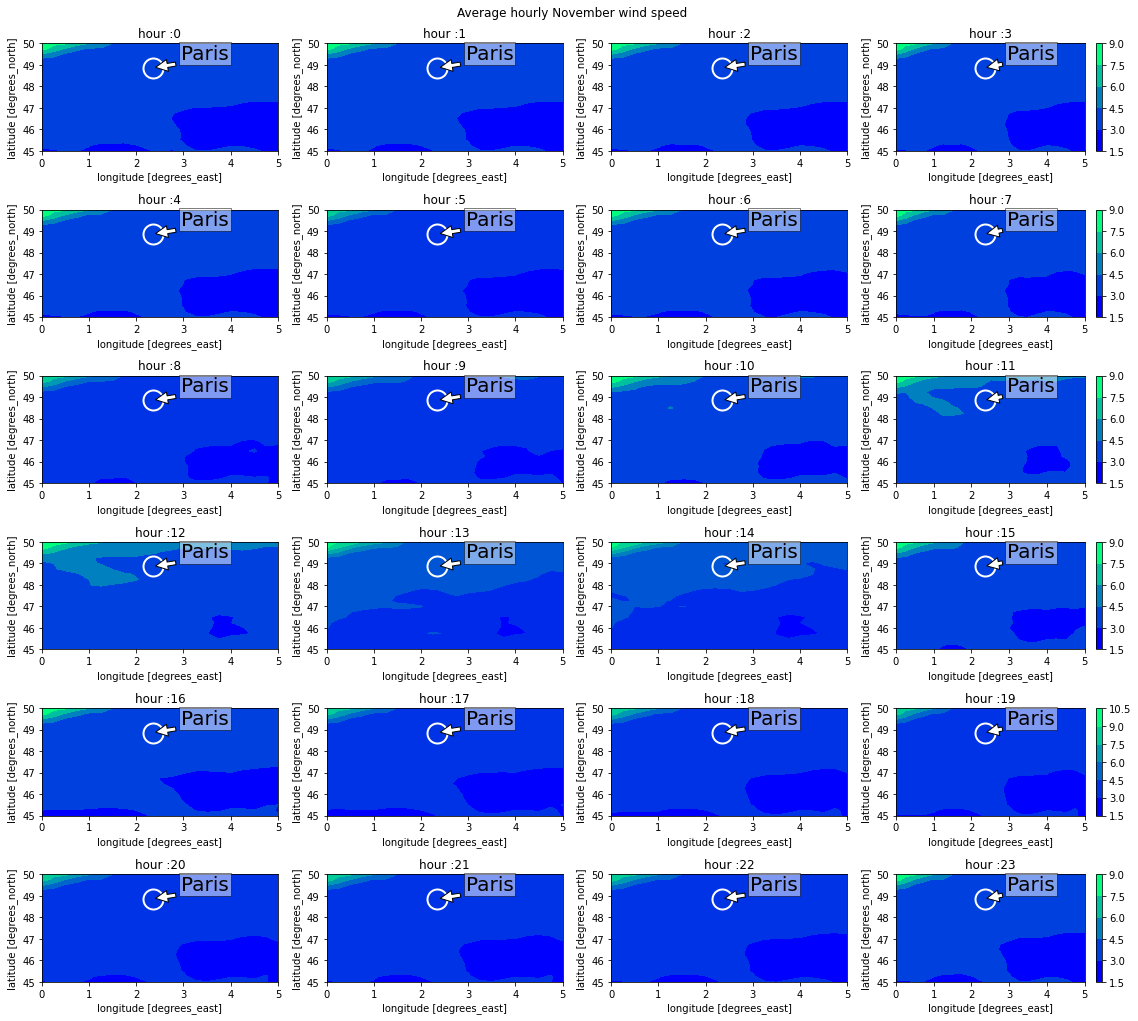

In [18]:
group = wind.groupby(wind.time.dt.hour)

f,axes = plt.subplots(6,4, figsize=(16,14))
axx =axes.flatten()


for idx,frame in group:
    if idx not in [3,7,11,15,19,23]: 
        cb = False
    else : 
        cb =True
    frame.mean(dim='time').plot.contourf(cmap='winter',ax=axx[idx],add_colorbar=cb)
    
    axx[idx].set_title('hour :{}'.format(idx))
    axx[idx].plot([paris_lon], [paris_lat], 'o', ms=20, markerfacecolor="None",markeredgecolor='white', markeredgewidth=2)
    axx[idx].annotate('Paris', c='k',xy = (paris_lon, paris_lat),
                      xytext=(paris_lon+0.6,paris_lat+0.4),
                      arrowprops = dict(facecolor='white',shrink=0.1), fontsize=20,bbox={'facecolor': 'white', 
                                                                                          'alpha': 0.5, 'pad': 2})
        
plt.tight_layout()              
f.suptitle('Average hourly November wind speed', weight=16,ha ='center', va='top', y= 1.01)


# Oversimplified assumption 2

From our knowledge of gas laws we can expect hot air to weigh lighter and rise further up and mix with cooler gas in the surrounding regions. We therefore look for evidences in the contour map of temperature for sharp gradients in the vicinity of Paris that will explain the formation of fog holes above Paris. 
As earlier we group the temperature profile by the hour of the day and compute the mean over time to plot the contour maps to seek the hour of the day when on average the temperature gradient is sharp

In [209]:
temp = metds.t2m
hours =[]

for i in range(24):
    hightemp = temp[temp.time.dt.hour==i].sel(latitude =paris_lat,longitude =paris_lon, method ='nearest')
    df = hightemp.to_dataframe('hightemp')
    hours.append(df['hightemp'].describe())
    

#packing the data as a dataframe

df = pd.DataFrame(hours, index =range(24))
df.sort_values('mean',ascending=False, inplace=True)
df.head(10)


,count,mean,std,min,25%,50%,75%,max
14,480.0,283.361633,3.654530,271.844269,281.172279,283.504654,285.690926,294.146057
13,480.0,283.260101,3.669465,271.712708,280.955307,283.485901,285.609589,293.709900
15,480.0,283.135162,3.596586,271.777100,280.934311,283.197830,285.534279,293.736206
12,480.0,282.916351,3.679977,271.393555,280.521271,283.151642,285.268204,292.920990
16,480.0,282.475494,3.584214,271.238464,280.238525,282.503296,285.006302,292.880127
11,480.0,282.306946,3.666472,270.865570,279.859596,282.619186,284.681694,292.112488
17,480.0,281.767975,3.599403,270.522919,279.301674,281.707962,284.452438,292.098511
10,480.0,281.516174,3.684698,270.244080,279.150490,281.657852,283.931015,290.706055
18,480.0,281.378479,3.651285,271.129303,278.832619,281.391052,284.073792,291.327515
19,480.0,281.060272,3.719282,270.622589,278.417725,281.153656,283.831642,290.781616


Text(0.5, 1.01, 'Average hourly November 2m temperature')

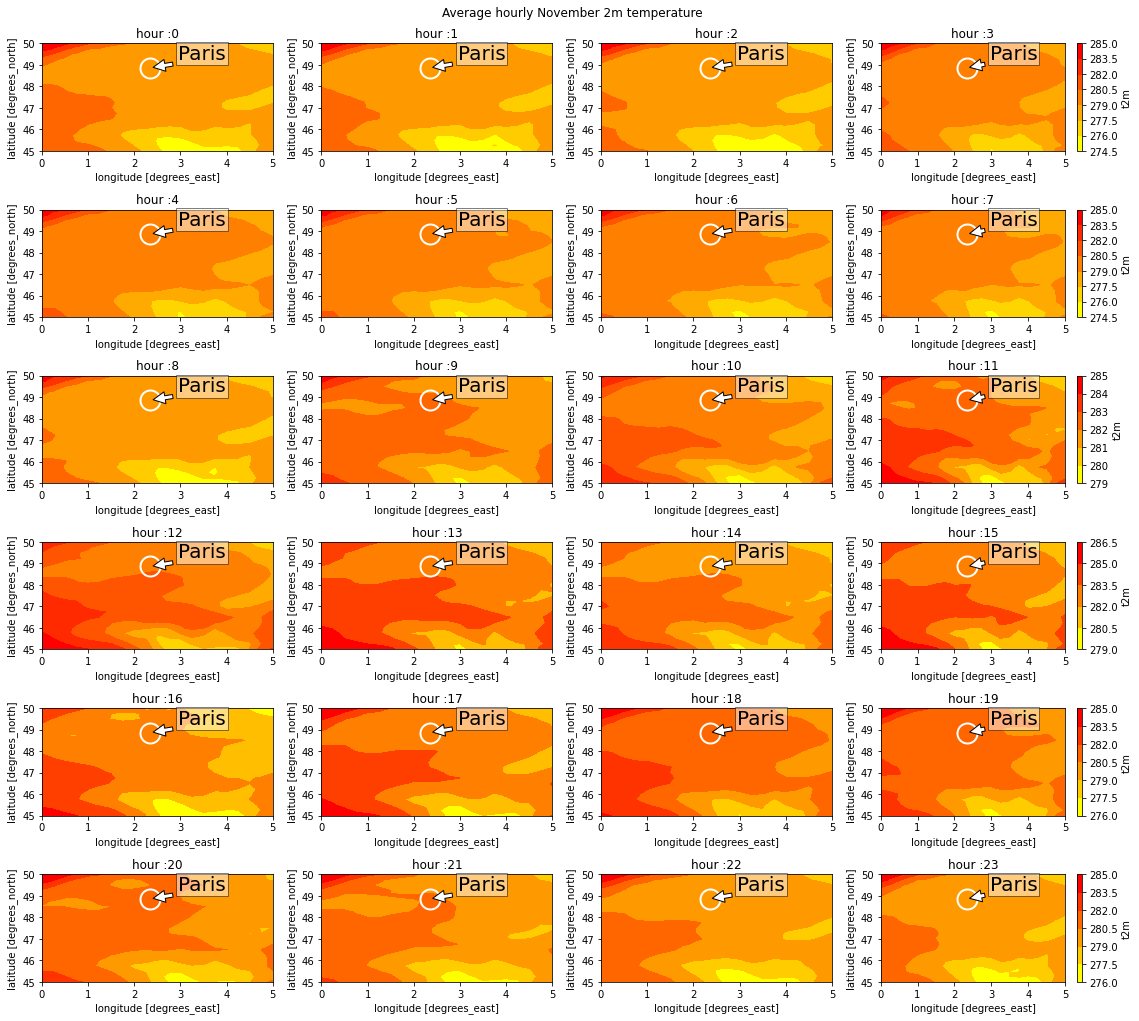

In [19]:
temp = metds.t2m
group = temp.groupby(temp.time.dt.hour)

f,axes = plt.subplots(6,4, figsize=(16,14))
axx =axes.flatten()


for idx,frame in group:
    if idx not in [3,7,11,15,19,23]: 
        cb = False
    else : 
        cb =True
    frame.mean(dim='time').plot.contourf(cmap='autumn_r',ax=axx[idx],add_colorbar=cb)
    
    axx[idx].set_title('hour :{}'.format(idx))
    axx[idx].plot([paris_lon], [paris_lat], 'o', ms=20, markerfacecolor="None",markeredgecolor='white', markeredgewidth=2)
    axx[idx].annotate('Paris', c='k',xy = (paris_lon, paris_lat),
                      xytext=(paris_lon+0.6,paris_lat+0.4),
                      arrowprops = dict(facecolor='white',shrink=0.1), fontsize=20,bbox={'facecolor': 'white', 
                                                                                          'alpha': 0.5, 'pad': 2})
        
plt.tight_layout()              
f.suptitle('Average hourly November 2m temperature', weight=16,ha ='center', va='top', y= 1.01)


The contour maps show us the hour of the day in november when Paris is on average warmer than its surroundings. Maps corresponding to hours 9 hours and 21 hours suggest higher temperature above Paris compared to regions in vicinity. While this doesn't exactly agree with our inferences from the MSL data, the difference is only by an hour from 10 and 20 hours peak we observed earlier.
We can now make our thrid oversimplified assumption concerning the boundary layer height and examine the dataset to see what we can infer from it.

# Oversimplified assumption 3 

Boundary layer height, BLH in the presence of fog holes would be much larger compared to the surrounding regions.

Let's plot contour maps as before for the hourly temporal means to see if there's any distinguishing pattern

Text(0.5, 1.01, 'Average hourly November BLH')

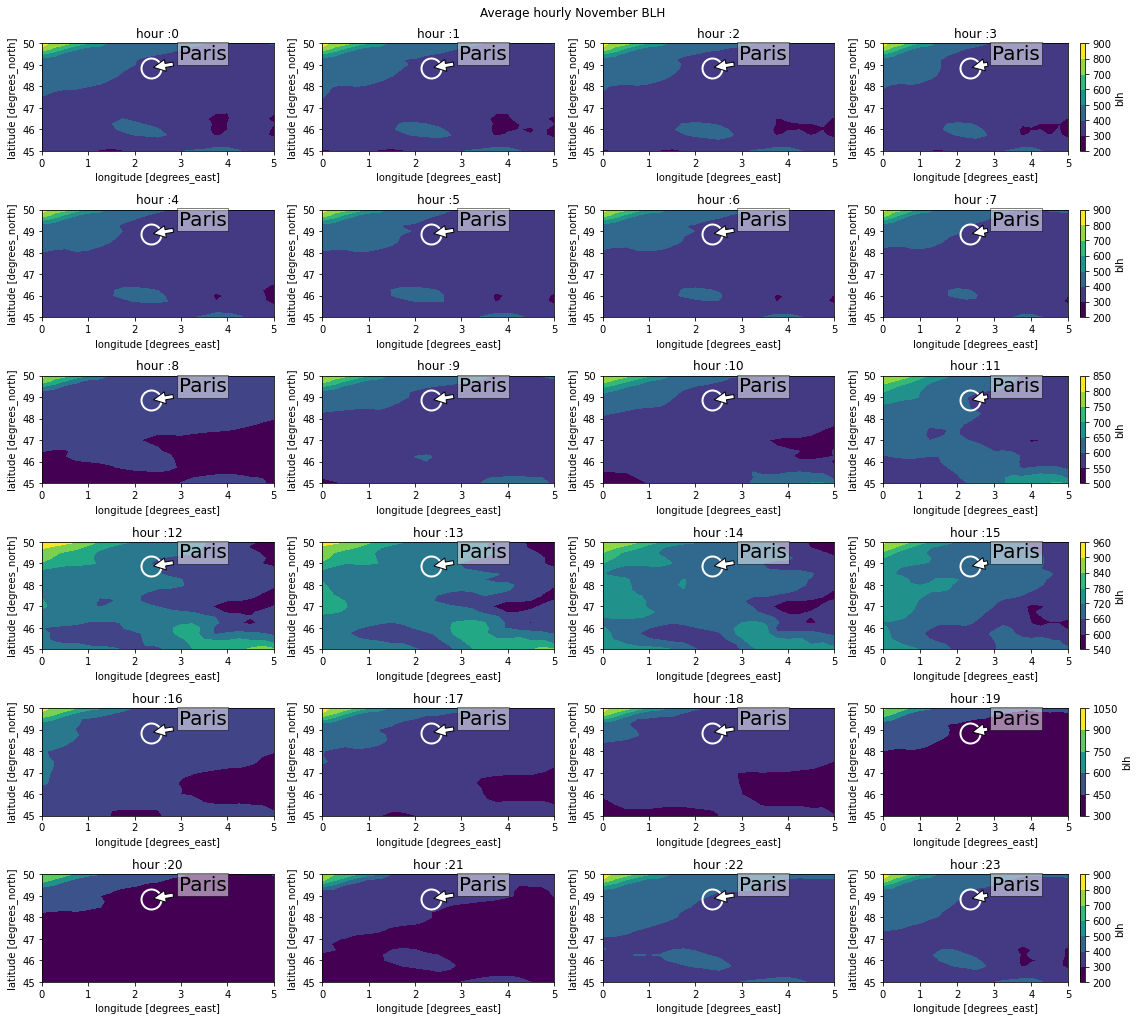

In [20]:
blh = metds.blh
group = blh.groupby(blh.time.dt.hour)

f,axes = plt.subplots(6,4, figsize=(16,14))
axx =axes.flatten()

for idx,frame in group:
    if idx not in [3,7,11,15,19,23]: 
        cb = False
    else : 
        cb =True
    frame.mean(dim='time').plot.contourf(ax=axx[idx],add_colorbar=cb)
    
    axx[idx].set_title('hour :{}'.format(idx))
    axx[idx].plot([paris_lon], [paris_lat], 'o', ms=20, markerfacecolor="None",markeredgecolor='white', markeredgewidth=2)
    axx[idx].annotate('Paris', c='k',xy = (paris_lon, paris_lat),
                      xytext=(paris_lon+0.6,paris_lat+0.4),
                      arrowprops = dict(facecolor='white',shrink=0.1), fontsize=20,bbox={'facecolor': 'white', 
                                                                                          'alpha': 0.5, 'pad': 2})
        
plt.tight_layout()              
f.suptitle('Average hourly November BLH', weight=16,ha ='center', va='top', y= 1.01)

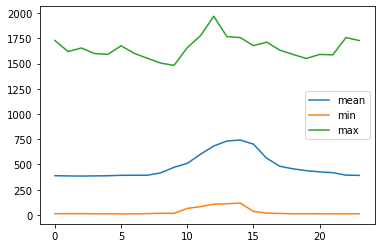

In [222]:
hours =[]

for i in range(24):
    paris_blh = blh[blh.time.dt.hour==i].sel(latitude =paris_lat,longitude =paris_lon, method ='nearest')
    df = paris_blh.to_dataframe()
    hours.append(df['blh'].describe())
    

#packing the data as a dataframe

df = pd.DataFrame(hours, index =range(24))
df[['mean','min','max']].plot()

We infer from the spread between the mean, min and max that the std deviation must be large. The mean and min temperature show the expected pattern of rising during the day after sunrise and falling back in after sunset. However, the maximum curve dips unexpectedly around 10 hours, which appears to be an anomaly.

Average BLH range:  (367.18864288330076, 760.6854110717774)
Average hour of highest boundary layer:  14


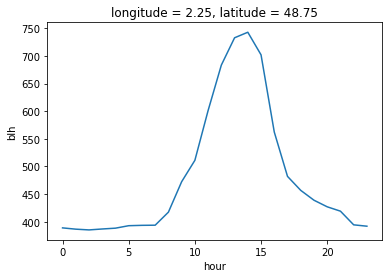

In [22]:
group = blh.groupby(blh.time.dt.hour)
group.mean(dim='time').sel(latitude =paris_lat,longitude=paris_lon,method='nearest').plot()
print('Average BLH range: ', plt.gca().get_ylim())
print('Average hour of highest boundary layer: ',plt.gca().lines[0].get_xydata()[:,1].argmax())

It's not surprising that the average height of the boundary layer is highest at the hour of the day when the temperature is highest, i.e., between 14 and 15 hours.

# Cloud dataset

Let's turn our attention now to the could dataset to verify the prevalence of fog holes at the most probable temporal regions based on our analysis, uptil now. 

### Dates 2004-11-20 10:00 , 2013-11-18 10:00, 201-11-18 10:00

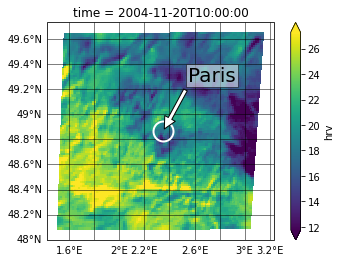

In [278]:
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

# define map projection
ax = plt.subplot(projection=ccrs.PlateCarree())

hrv = data.hrv

hrv.sel(time ='20041120 1000').plot.pcolormesh('lon','lat',ax=ax, robust=True, transform = ccrs.PlateCarree())
plt.plot([paris_lon], [paris_lat], 'o', ms=20, markerfacecolor="None",markeredgecolor='white', markeredgewidth=2)
# add the annotation 'Paris' and arrow to the plot
plt.annotate('Paris', c='k',xy = (paris_lon, paris_lat), xytext=(paris_lon+0.2,paris_lat+0.4),
        arrowprops = dict(facecolor='white',shrink=0.05), fontsize=20,
    bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 2}) 

# add gridlines
gl = ax.gridlines(draw_labels=True,linewidth=1, color='k', alpha=0.5,)
gl.top_labels = False
gl.right_labels = False
#gl.xlines = False
#gl.ylines = False
gl.xlocator = mticker.FixedLocator([1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3.2,3.4])
gl.ylocator = mticker.FixedLocator([47.8,48.,48.2,48.4,48.6,48.8, 49,49.2,49.4,49.6,49.8])

# set color of grid lines and x/y labels
#gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'black'}
#gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'color': 'black'}

### 2013-11-18 10:00

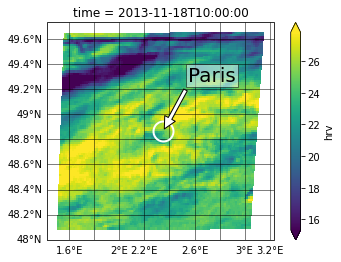

In [279]:
ax = plt.subplot(projection=ccrs.PlateCarree())

hrv = data.hrv

hrv.sel(time ='20131118 1000').plot.pcolormesh('lon','lat',ax=ax, robust=True, transform = ccrs.PlateCarree())
plt.plot([paris_lon], [paris_lat], 'o', ms=20, markerfacecolor="None",markeredgecolor='white', markeredgewidth=2)
# add the annotation 'Paris' and arrow to the plot
plt.annotate('Paris', c='k',xy = (paris_lon, paris_lat), xytext=(paris_lon+0.2,paris_lat+0.4),
        arrowprops = dict(facecolor='white',shrink=0.05), fontsize=20,
    bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 2}) 

# add gridlines
gl = ax.gridlines(draw_labels=True,linewidth=1, color='k', alpha=0.5,)
gl.top_labels = False
gl.right_labels = False
#gl.xlines = False
#gl.ylines = False
gl.xlocator = mticker.FixedLocator([1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3.2,3.4])
gl.ylocator = mticker.FixedLocator([47.8,48.,48.2,48.4,48.6,48.8, 49,49.2,49.4,49.6,49.8])

# set color of grid lines and x/y labels
#gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'black'}
#gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'color': 'black'}

## 2017-11-18 10:00

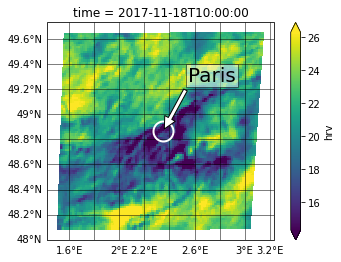

In [280]:
ax = plt.subplot(projection=ccrs.PlateCarree())

hrv = data.hrv

hrv.sel(time ='20171118 1000').plot.pcolormesh('lon','lat',ax=ax, robust=True, transform = ccrs.PlateCarree())
plt.plot([paris_lon], [paris_lat], 'o', ms=20, markerfacecolor="None",markeredgecolor='white', markeredgewidth=2)
# add the annotation 'Paris' and arrow to the plot
plt.annotate('Paris', c='k',xy = (paris_lon, paris_lat), xytext=(paris_lon+0.2,paris_lat+0.4),
        arrowprops = dict(facecolor='white',shrink=0.05), fontsize=20,
    bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 2}) 

# add gridlines
gl = ax.gridlines(draw_labels=True,linewidth=1, color='k', alpha=0.5,)
gl.top_labels = False
gl.right_labels = False
#gl.xlines = False
#gl.ylines = False
gl.xlocator = mticker.FixedLocator([1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3.2,3.4])
gl.ylocator = mticker.FixedLocator([47.8,48.,48.2,48.4,48.6,48.8, 49,49.2,49.4,49.6,49.8])

# set color of grid lines and x/y labels
#gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'black'}
#gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'color': 'black'}

Interestingly, the following observation appearing like a fog hole appeared north west of Paris on 2011-11-24 at 10:00